In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("wdbc.csv", sep=',', names=["ID","Diagnosis","radius", "texture", "perimeter", "area","smoothness","compactness","concavity","concavepoints","symmetry","fractaldimension","radius_se", "texture_se", "perimeter_se", "area_se","smoothness_se","compactness_se","concavity_se","concavepoints_se","symmetry_se","fractaldimension_se","radius_worst", "texture_worst", "perimeter_worst", "area_worst","smoothness_worst","compactness_worst","concavity_worst","concavepoints_worst","symmetry_worst","fractaldimension_worst"])


In [3]:
df

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractaldimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      569 non-null    int64  
 1   Diagnosis               569 non-null    object 
 2   radius                  569 non-null    float64
 3   texture                 569 non-null    float64
 4   perimeter               569 non-null    float64
 5   area                    569 non-null    float64
 6   smoothness              569 non-null    float64
 7   compactness             569 non-null    float64
 8   concavity               569 non-null    float64
 9   concavepoints           569 non-null    float64
 10  symmetry                569 non-null    float64
 11  fractaldimension        569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

In [5]:
df['Tipo']= df['Diagnosis'].apply(lambda x:-1 if x=='M' else 1)
df= df[["ID","Diagnosis","radius", "texture", "perimeter", "area","smoothness","compactness","concavity","concavepoints","symmetry","fractaldimension","radius_se", "texture_se", "perimeter_se", "area_se","smoothness_se","compactness_se","concavity_se","concavepoints_se","symmetry_se","fractaldimension_se","radius_worst", "texture_worst", "perimeter_worst", "area_worst","smoothness_worst","compactness_worst","concavity_worst","concavepoints_worst","symmetry_worst","fractaldimension_worst","Tipo"]]

In [6]:
X= df[["radius", "texture", "perimeter", "area","smoothness","compactness","concavity","concavepoints","symmetry","fractaldimension","radius_se", "texture_se", "perimeter_se", "area_se","smoothness_se","compactness_se","concavity_se","concavepoints_se","symmetry_se","fractaldimension_se","radius_worst", "texture_worst", "perimeter_worst", "area_worst","smoothness_worst","compactness_worst","concavity_worst","concavepoints_worst","symmetry_worst","fractaldimension_worst"]]
X

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractaldimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y= df[['Tipo']]
y

,Tipo
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
564,-1
565,-1
566,-1
567,-1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


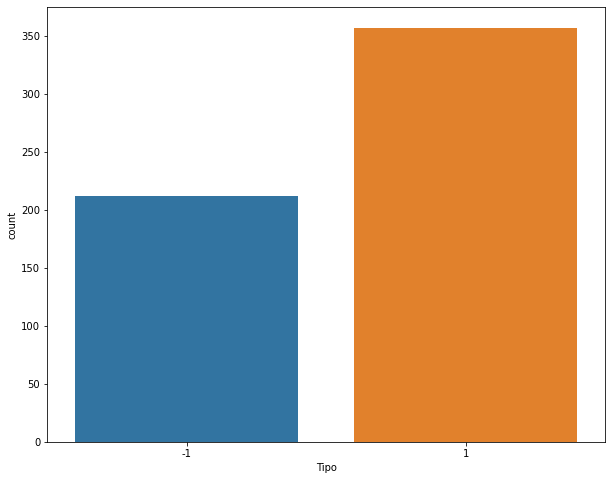

In [8]:
plt.figure(figsize = (10, 8))
sns.countplot(df['Tipo'])
plt.show()

In [9]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [10]:
def modelo(X_train, y_train, X_test, y_test, clf):
    print(get_clf_name(clf))
    clf.fit(X_train, y_train)
    
    # training matriz de confusion
    y_pred = clf.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Exactitud Train: ", accuracy_score(y_train, y_pred))
    print("Precision Train: ", precision_score(y_train, y_pred)) 
    print("Sensibilidad Train: ", metrics.recall_score(y_train, y_pred))
    print("Especificidad Train: ", metrics.recall_score(y_train, y_pred,pos_label=-1))
    print("Media_Armonica Train: ", metrics.f1_score(y_train, y_pred))
    
    # test matriz de confusion
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Exactitud Test: ", accuracy_score(y_test, y_pred))
    print("Precision Test: ", precision_score(y_test, y_pred)) #porcentaje de casos positivos detectados.
    print("Sensibilidad Test: ", metrics.recall_score(y_test, y_pred)) #capacidad de de poder detectar correctamente la enfermedad entre los enfermos.
    print("Especificidad Test: ", metrics.recall_score(y_test, y_pred,pos_label=-1))
    print("Media_Armonica Test: ", metrics.f1_score(y_test, y_pred))
    return disp

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [12]:
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier (n_neighbors=3) #Se pprueba hasta 10 pero sigue dando la misma tendencia
tree_clf = DecisionTreeClassifier(max_depth=3) #Sin parametro menora exactitud
rf_clf = RandomForestClassifier()  #Sin parametro mejora exactitud en 1%
svm_clf =  SVC(kernel="linear", C=0.025) 


SGDClassifier
Exactitud Train:  0.9045226130653267
Precision Train:  0.9451476793248945
Sensibilidad Train:  0.8995983935742972
Especificidad Train:  0.912751677852349
Media_Armonica Train:  0.9218106995884774
Exactitud Test:  0.9005847953216374


C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision Test:  0.9252336448598131
Sensibilidad Test:  0.9166666666666666
Especificidad Test:  0.873015873015873
Media_Armonica Test:  0.9209302325581395


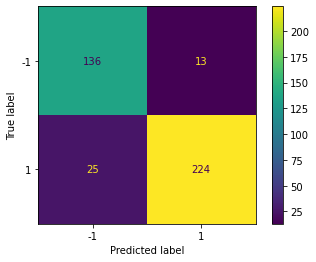

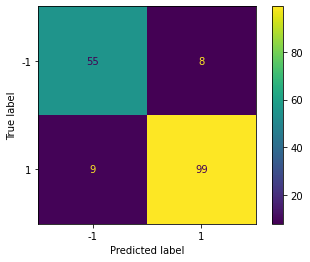

In [13]:
modelo(X_train, y_train, X_test, y_test, linear_clf )

KNeighborsClassifier


C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Exactitud Train:  0.957286432160804
Precision Train:  0.9461538461538461
Sensibilidad Train:  0.9879518072289156
Especificidad Train:  0.9060402684563759
Media_Armonica Train:  0.9666011787819252
Exactitud Test:  0.9298245614035088
Precision Test:  0.9363636363636364
Sensibilidad Test:  0.9537037037037037
Especificidad Test:  0.8888888888888888
Media_Armonica Test:  0.944954128440367


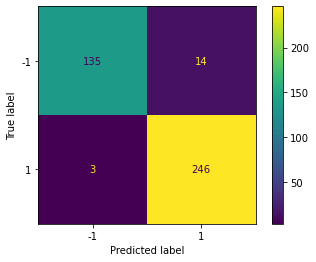

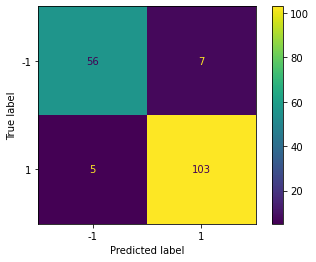

In [14]:
modelo(X_train, y_train, X_test, y_test,knn_clf)

RandomForestClassifier


C:\Users\MyLENOVO\AppData\Local\Temp\ipykernel_13564\2269463497.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Exactitud Train:  1.0
Precision Train:  1.0
Sensibilidad Train:  1.0
Especificidad Train:  1.0
Media_Armonica Train:  1.0
Exactitud Test:  0.9590643274853801
Precision Test:  0.9809523809523809
Sensibilidad Test:  0.9537037037037037
Especificidad Test:  0.9682539682539683
Media_Armonica Test:  0.9671361502347416


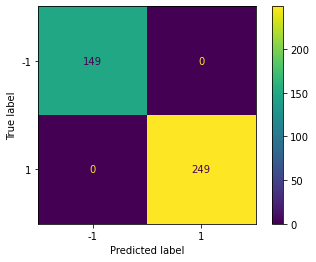

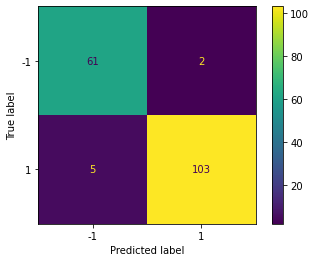

In [15]:
modelo(X_train, y_train, X_test, y_test, rf_clf )

DecisionTreeClassifier
Exactitud Train:  0.9723618090452262
Precision Train:  0.9612403100775194
Sensibilidad Train:  0.9959839357429718
Especificidad Train:  0.9328859060402684
Media_Armonica Train:  0.9783037475345169
Exactitud Test:  0.9298245614035088
Precision Test:  0.9615384615384616
Sensibilidad Test:  0.9259259259259259
Especificidad Test:  0.9365079365079365
Media_Armonica Test:  0.9433962264150944


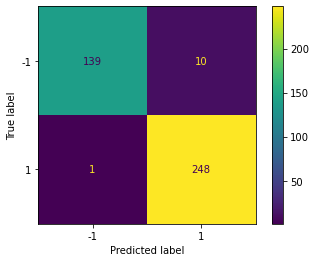

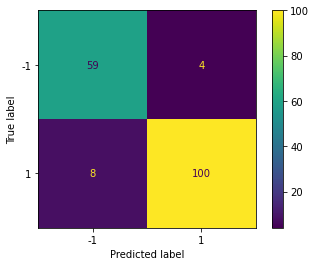

In [16]:
modelo(X_train, y_train, X_test, y_test, tree_clf )

SVC
Exactitud Train:  0.9623115577889447


C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision Train:  0.9717741935483871
Sensibilidad Train:  0.9678714859437751
Especificidad Train:  0.9530201342281879
Media_Armonica Train:  0.9698189134808854
Exactitud Test:  0.9239766081871345
Precision Test:  0.9357798165137615
Sensibilidad Test:  0.9444444444444444
Especificidad Test:  0.8888888888888888
Media_Armonica Test:  0.9400921658986177


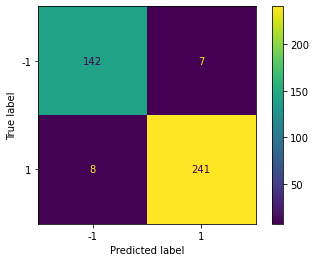

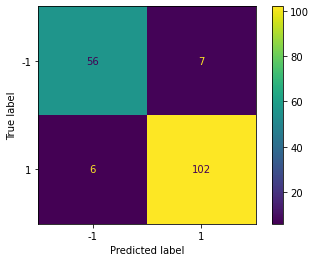

In [17]:
modelo(X_train, y_train, X_test, y_test, svm_clf )

In [18]:
# Otra manera de obtener la exactitud es importando la función de entrenamiento y validación cruzada
# Devuelve un array de tipo Numpy, por cada validación en este caso 10
nScores = cross_val_score(rf_clf, X, y, cv=10)
nScores 
print('Exactitud en cada Validacion Cruzada :{}'.format(nScores ))
#El valor de exactitud obtenido de nuestro modelo con función de entrenamiento y validación cruzada
accuracy=nScores.mean() 
print('Exactitud de Modelo RandomForestClassifier con Validación Cruzada:{}'.format(accuracy))

C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MyLENOVO\AppData\Roaming\Python\Python39\site-packages\skl

Exactitud en cada Validacion Cruzada :[0.98245614 0.89473684 0.92982456 0.94736842 1.         0.98245614
 0.98245614 0.98245614 0.94736842 0.98214286]
Exactitud de Modelo RandomForestClassifier con Validación Cruzada:0.9631265664160402
